In [116]:
# Import libraries 

# data wrangling
import pandas as pd
import numpy as np

# data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# clustering 
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import RobustScaler 
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

# import libraries
import mysql.connector
from mysql.connector import Error

# filter wrangling
import warnings 
warnings.filterwarnings("ignore")

In [117]:
# usage example (the mysql detail already defined)
# simple query
query_order_garden_care = """
SELECT
  order_garden_care_detail.id AS id,
  order_garden_care_detail.id_order_garden_care AS id_order_garden_care,
  order_garden_care_detail.status AS status,
  order_garden_care.id_user,
  order_garden_care.price,
  promo_code.code ,
  category_size.size ,
  garden_care.care_count AS jumlah_perawatan,
  garden_care.manpower AS manpower_required,
  order_garden_care.address,
  address_components.address_componentable_id ,
  CAST(address_components.latitude AS FLOAT) AS lat,
  CAST(address_components.longitude AS FLOAT) AS lng,
  order_garden_care.created_at AS order_date 
FROM
  order_garden_care_detail
  JOIN order_garden_care ON order_garden_care_detail.id_order_garden_care = order_garden_care.id
  LEFT JOIN category_size ON order_garden_care.id_category_size = category_size.id_category
  LEFT JOIN promo_code ON order_garden_care.id_promo_code = promo_code.id_promo 
  LEFT JOIN garden_care ON garden_care.id = order_garden_care.id_garden_care
  LEFT JOIN address_components ON order_garden_care.id = address_components.address_componentable_id
  LEFT JOIN user ON order_garden_care.id_user = user.id_user
WHERE
  (
    order_garden_care_detail.maintenance_schedule IS NULL
  )
  AND (
    (order_garden_care_detail.status <> 'expired')
    OR (order_garden_care_detail.status IS NULL)
  )
  AND address_components.address_componentable_type LIKE '%OrderGardenCare'
GROUP BY
  order_garden_care_detail.id_order_garden_care,
  order_garden_care_detail.status,
  order_garden_care.id_user,
  garden_care.care_count,
  garden_care.manpower,
  category_size.size,
  order_garden_care.address,
  order_garden_care.price,
  order_garden_care.id_promo_code,
  address_components.latitude,
  address_components.longitude,
  order_garden_care.created_at
"""

In [118]:
# usage example (the mysql detail already defined)
# simple query
query_order_garden = """
SELECT
  order_garden.id_order AS id_order_garden,
  order_garden.id_user,
  order_garden.id_gardener,
  order_garden.status AS status_garden,
  promo_code.code ,
  order_garden.size_area,
  order_garden.address,
  address_components.address_componentable_id ,
  CAST(address_components.latitude AS FLOAT) AS lat,
  CAST(address_components.longitude AS FLOAT) AS lng,
  order_garden.created_at AS order_date
FROM
  order_garden
  JOIN address_components ON order_garden.id_order = address_components.address_componentable_id
  LEFT JOIN promo_code ON order_garden.id_promo = promo_code.id_promo
  JOIN user ON order_garden.id_user = user.id_user
WHERE
   (
    (order_garden.status <> 'expired')
    OR (order_garden.status IS NULL)
  ) AND address_components.address_componentable_type LIKE '%OrderGarden'
GROUP BY
  order_garden.id_order,
  order_garden.status,
  order_garden.id_user,
  order_garden.id_gardener,
  order_garden.id_promo,
  order_garden.size_area,
  order_garden.address,
  address_components.address_componentable_id ,
  address_components.latitude,
  address_components.longitude,
  order_garden.created_at

"""

In [119]:
# usage example (the mysql detail already defined)
# simple query
query_order_design = """
SELECT
  order_design.id_order AS id_order_design,
  order_design.id_user,
  order_design.id_designer,
  promo_code.code ,
  order_design.status AS status_design,
  order_design.address,
  address_components.address_componentable_id ,
  CAST(address_components.latitude AS FLOAT) AS lat,
  CAST(address_components.longitude AS FLOAT) AS lng,
  order_design.created_at AS order_date
FROM
  order_design 
  LEFT JOIN detail_order_design ON detail_order_design.id_order = order_design.id_order
  LEFT JOIN promo_code ON order_design.id_promo = promo_code.id_promo
  JOIN address_components ON order_design.id_order = address_components.address_componentable_id
  LEFT JOIN user ON order_design.id_user = user.id_user
WHERE
    ((order_design.status <> 'expired')
    OR (order_design.status IS NULL))
  	AND address_components.address_componentable_type LIKE '%OrderDesign'
GROUP BY
  order_design.id_order,
  order_design.id_user,
  order_design.id_designer,
  order_design.id_promo ,
  order_design.address,
  order_design.status,
  address_components.address_componentable_id ,
  address_components.latitude,
  address_components.longitude,
  order_design.created_at
"""

In [120]:
# usage example (the mysql detail already defined)
# simple query
query_address_components_garden_care = """
 SELECT
        address_components.address_componentable_id ,
        (CASE
            WHEN LOWER(address_components.administrative_area_level_1) = 'jakarta' THEN 'Daerah Khusus Ibukota Jakarta'
            WHEN LOWER(address_components.administrative_area_level_1) = 'west java' THEN 'Jawa Barat'
            WHEN LOWER(address_components.administrative_area_level_1) = 'east java' THEN 'Jawa Timur'
            WHEN LOWER(address_components.administrative_area_level_1) = 'north sumatra' THEN 'Sumatera Utara'
            WHEN LOWER(address_components.administrative_area_level_1) = 'federal district' THEN 'Distrik Federal'
            ELSE address_components.administrative_area_level_1
        END) AS administrative_area_level_1 ,
        (CASE
            WHEN LOWER(address_components.administrative_area_level_2) = 'east jakarta city' THEN 'Jakarta Timur'
            WHEN LOWER(address_components.administrative_area_level_2) = 'west jakarta city' THEN 'Jakarta Barat'
            WHEN LOWER(address_components.administrative_area_level_2) = 'north jakarta city' THEN 'Jakarta Utara'
            WHEN LOWER(address_components.administrative_area_level_2) = 'central jakarta city' THEN 'Jakarta Pusat'
            WHEN LOWER(address_components.administrative_area_level_2) = 'depok city' THEN 'Depok'
            WHEN LOWER(address_components.administrative_area_level_2) = 'tangerang regency' THEN 'Tangerang'
            WHEN LOWER(address_components.administrative_area_level_2) = 'tangerang city' THEN 'Tangerang'
            WHEN LOWER(address_components.administrative_area_level_2) = 'bogor regency' THEN 'Bogor'
            WHEN LOWER(address_components.administrative_area_level_2) = 'ciamis regency' THEN 'Ciamis'
            WHEN LOWER(address_components.administrative_area_level_2) = 'cimahi city' THEN 'Cimahi'
            WHEN LOWER(address_components.administrative_area_level_2) = 'bandung regency' THEN 'Bandung'
            WHEN LOWER(address_components.administrative_area_level_2) = 'west bandung regency' THEN 'Bandung Barat'
            WHEN LOWER(address_components.administrative_area_level_2) = 'sukabumi city' THEN 'Sukabumi'
            WHEN LOWER(address_components.administrative_area_level_2) = 'klungkung regency' THEN 'Klungkung'
            WHEN LOWER(address_components.administrative_area_level_2) = 'bekasi regency' THEN 'Kuningan'
            WHEN LOWER(address_components.administrative_area_level_2) = 'deli serdang regency' THEN 'Deli Serdang'
            WHEN LOWER(address_components.administrative_area_level_2) = 'denpasar city' THEN 'Denpasar'
            WHEN LOWER(address_components.administrative_area_level_2) = 'malang city ' THEN 'Malang'
            WHEN LOWER(address_components.administrative_area_level_2) = 'south tangerang city' THEN 'Tangerang Selatan'
            ELSE address_components.administrative_area_level_2
        END) AS administrative_area_level_2 ,
         (CASE
            WHEN LOWER(address_components.administrative_area_level_3) = 'kebonjeruk' THEN 'Kebon Jeruk'
            WHEN LOWER(address_components.administrative_area_level_3) = 'pandeglang sub-sistrict' THEN 'Pandeglang'
            WHEN LOWER(address_components.administrative_area_level_3) = 'rawalumbu' THEN 'Rawa Lumbu'
            WHEN LOWER(address_components.administrative_area_level_3) = 'serpong sub-district' THEN 'Serpong'
            ELSE address_components.administrative_area_level_3
        END) AS administrative_area_level_3 
    FROM address_components
WHERE address_components.address_componentable_type LIKE '%OrderGardenCare'
"""

In [121]:
# usage example (the mysql detail already defined)
# simple query
query_address_components_order_garden = """
 SELECT
        address_components.address_componentable_id ,
        (CASE
            WHEN LOWER(address_components.administrative_area_level_1) = 'jakarta' THEN 'Daerah Khusus Ibukota Jakarta'
            WHEN LOWER(address_components.administrative_area_level_1) = 'west java' THEN 'Jawa Barat'
            WHEN LOWER(address_components.administrative_area_level_1) = 'east java' THEN 'Jawa Timur'
            WHEN LOWER(address_components.administrative_area_level_1) = 'north sumatra' THEN 'Sumatera Utara'
            WHEN LOWER(address_components.administrative_area_level_1) = 'federal district' THEN 'Distrik Federal'
            ELSE address_components.administrative_area_level_1
        END) AS administrative_area_level_1 ,
        (CASE
            WHEN LOWER(address_components.administrative_area_level_2) = 'east jakarta city' THEN 'Jakarta Timur'
            WHEN LOWER(address_components.administrative_area_level_2) = 'west jakarta city' THEN 'Jakarta Barat'
            WHEN LOWER(address_components.administrative_area_level_2) = 'north jakarta city' THEN 'Jakarta Utara'
            WHEN LOWER(address_components.administrative_area_level_2) = 'central jakarta city' THEN 'Jakarta Pusat'
            WHEN LOWER(address_components.administrative_area_level_2) = 'depok city' THEN 'Depok'
            WHEN LOWER(address_components.administrative_area_level_2) = 'tangerang regency' THEN 'Tangerang'
            WHEN LOWER(address_components.administrative_area_level_2) = 'tangerang city' THEN 'Tangerang'
            WHEN LOWER(address_components.administrative_area_level_2) = 'bogor regency' THEN 'Bogor'
            WHEN LOWER(address_components.administrative_area_level_2) = 'ciamis regency' THEN 'Ciamis'
            WHEN LOWER(address_components.administrative_area_level_2) = 'cimahi city' THEN 'Cimahi'
            WHEN LOWER(address_components.administrative_area_level_2) = 'bandung regency' THEN 'Bandung'
            WHEN LOWER(address_components.administrative_area_level_2) = 'west bandung regency' THEN 'Bandung Barat'
            WHEN LOWER(address_components.administrative_area_level_2) = 'sukabumi city' THEN 'Sukabumi'
            WHEN LOWER(address_components.administrative_area_level_2) = 'klungkung regency' THEN 'Klungkung'
            WHEN LOWER(address_components.administrative_area_level_2) = 'bekasi regency' THEN 'Kuningan'
            WHEN LOWER(address_components.administrative_area_level_2) = 'deli serdang regency' THEN 'Deli Serdang'
            WHEN LOWER(address_components.administrative_area_level_2) = 'denpasar city' THEN 'Denpasar'
            WHEN LOWER(address_components.administrative_area_level_2) = 'malang city ' THEN 'Malang'
            WHEN LOWER(address_components.administrative_area_level_2) = 'south tangerang city' THEN 'Tangerang Selatan'
            ELSE address_components.administrative_area_level_2
        END) AS administrative_area_level_2 ,
         (CASE
            WHEN LOWER(address_components.administrative_area_level_3) = 'kebonjeruk' THEN 'Kebon Jeruk'
            WHEN LOWER(address_components.administrative_area_level_3) = 'pandeglang sub-sistrict' THEN 'Pandeglang'
            WHEN LOWER(address_components.administrative_area_level_3) = 'rawalumbu' THEN 'Rawa Lumbu'
            WHEN LOWER(address_components.administrative_area_level_3) = 'serpong sub-district' THEN 'Serpong'
            ELSE address_components.administrative_area_level_3
        END) AS administrative_area_level_3 
    FROM address_components
WHERE address_components.address_componentable_type LIKE '%OrderGarden'
"""

In [122]:
# usage example (the mysql detail already defined)
# simple query
query_address_components_order_design = """
 SELECT
        address_components.address_componentable_id ,
        (CASE
            WHEN LOWER(address_components.administrative_area_level_1) = 'jakarta' THEN 'Daerah Khusus Ibukota Jakarta'
            WHEN LOWER(address_components.administrative_area_level_1) = 'west java' THEN 'Jawa Barat'
            WHEN LOWER(address_components.administrative_area_level_1) = 'east java' THEN 'Jawa Timur'
            WHEN LOWER(address_components.administrative_area_level_1) = 'north sumatra' THEN 'Sumatera Utara'
            WHEN LOWER(address_components.administrative_area_level_1) = 'federal district' THEN 'Distrik Federal'
            ELSE address_components.administrative_area_level_1
        END) AS administrative_area_level_1 ,
        (CASE
            WHEN LOWER(address_components.administrative_area_level_2) = 'east jakarta city' THEN 'Jakarta Timur'
            WHEN LOWER(address_components.administrative_area_level_2) = 'west jakarta city' THEN 'Jakarta Barat'
            WHEN LOWER(address_components.administrative_area_level_2) = 'north jakarta city' THEN 'Jakarta Utara'
            WHEN LOWER(address_components.administrative_area_level_2) = 'central jakarta city' THEN 'Jakarta Pusat'
            WHEN LOWER(address_components.administrative_area_level_2) = 'depok city' THEN 'Depok'
            WHEN LOWER(address_components.administrative_area_level_2) = 'tangerang regency' THEN 'Tangerang'
            WHEN LOWER(address_components.administrative_area_level_2) = 'tangerang city' THEN 'Tangerang'
            WHEN LOWER(address_components.administrative_area_level_2) = 'bogor regency' THEN 'Bogor'
            WHEN LOWER(address_components.administrative_area_level_2) = 'ciamis regency' THEN 'Ciamis'
            WHEN LOWER(address_components.administrative_area_level_2) = 'cimahi city' THEN 'Cimahi'
            WHEN LOWER(address_components.administrative_area_level_2) = 'bandung regency' THEN 'Bandung'
            WHEN LOWER(address_components.administrative_area_level_2) = 'west bandung regency' THEN 'Bandung Barat'
            WHEN LOWER(address_components.administrative_area_level_2) = 'sukabumi city' THEN 'Sukabumi'
            WHEN LOWER(address_components.administrative_area_level_2) = 'klungkung regency' THEN 'Klungkung'
            WHEN LOWER(address_components.administrative_area_level_2) = 'bekasi regency' THEN 'Kuningan'
            WHEN LOWER(address_components.administrative_area_level_2) = 'deli serdang regency' THEN 'Deli Serdang'
            WHEN LOWER(address_components.administrative_area_level_2) = 'denpasar city' THEN 'Denpasar'
            WHEN LOWER(address_components.administrative_area_level_2) = 'malang city ' THEN 'Malang'
            WHEN LOWER(address_components.administrative_area_level_2) = 'south tangerang city' THEN 'Tangerang Selatan'
            ELSE address_components.administrative_area_level_2
        END) AS administrative_area_level_2 ,
         (CASE
            WHEN LOWER(address_components.administrative_area_level_3) = 'kebonjeruk' THEN 'Kebon Jeruk'
            WHEN LOWER(address_components.administrative_area_level_3) = 'pandeglang sub-sistrict' THEN 'Pandeglang'
            WHEN LOWER(address_components.administrative_area_level_3) = 'rawalumbu' THEN 'Rawa Lumbu'
            WHEN LOWER(address_components.administrative_area_level_3) = 'serpong sub-district' THEN 'Serpong'
            ELSE address_components.administrative_area_level_3
        END) AS administrative_area_level_3 
    FROM address_components
WHERE address_components.address_componentable_type LIKE '%OrderDesign'
"""

In [123]:
# define mysql details
host   = 'okegarden-laravel-prod-db-2024-11-15-0200.cgwhhgh85mr3.ap-southeast-3.rds.amazonaws.com'
port   = '3306'
user   = 'intern_mes'
passwd = 'sdfDFLES342982Ddlsdksd'
databs = 'okegarden_laravel_prod_db'

In [124]:
# function to fetch data from database, the connection is closed after use.
def fetch_data(host_name, port_name, user_name, user_password, db_name, query, params=None):
    try:
        # use with to ensure the connection is closed after use
        with mysql.connector.connect(
            host=host_name,
            port=port_name,
            user=user_name,
            password=user_password,
            database=db_name
        ) as connection:
            data = pd.read_sql(query, connection, params=params) # read the query to dataframe format
            return data

    except Error as e:
        print(f"Error while connecting to MySQL or fetching data: {e}")
        return None

### Load Table 

In [125]:
# fetch data using function
df_ogc = fetch_data(host, port, user, passwd, databs, query_order_garden_care)

In [126]:
# fetch data using function
df_og = fetch_data(host, port, user, passwd, databs, query_order_garden)

In [127]:
# fetch data using function
df_od = fetch_data(host, port, user, passwd, databs, query_order_design)

In [188]:
# fetch data using function
address_components_garden_care = fetch_data(host, port, user, passwd, databs, query_address_components_garden_care)

In [189]:
# fetch data using function
address_components_order_garden = fetch_data(host, port, user, passwd, databs, query_address_components_order_garden)

In [190]:
# fetch data using function
address_components_order_design = fetch_data(host, port, user, passwd, databs, query_address_components_order_design)

In [128]:
# info order garden care
df_ogc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id                        101 non-null    int64         
 1   id_order_garden_care      101 non-null    int64         
 2   status                    101 non-null    object        
 3   id_user                   101 non-null    int64         
 4   price                     101 non-null    float64       
 5   code                      98 non-null     object        
 6   size                      101 non-null    object        
 7   jumlah_perawatan          101 non-null    int64         
 8   manpower_required         101 non-null    int64         
 9   address                   101 non-null    object        
 10  address_componentable_id  101 non-null    int64         
 11  lat                       101 non-null    float64       
 12  lng                   

In [129]:
# info order garden 
df_og.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id_order_garden           92 non-null     int64         
 1   id_user                   92 non-null     int64         
 2   id_gardener               88 non-null     float64       
 3   status_garden             92 non-null     object        
 4   code                      24 non-null     object        
 5   size_area                 92 non-null     float64       
 6   address                   92 non-null     object        
 7   address_componentable_id  92 non-null     int64         
 8   lat                       92 non-null     float64       
 9   lng                       92 non-null     float64       
 10  order_date                92 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(3), object(3)
memory usage: 8.0+ KB


In [130]:
# info order design
df_od.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id_order_design           199 non-null    int64         
 1   id_user                   199 non-null    int64         
 2   id_designer               185 non-null    float64       
 3   code                      189 non-null    object        
 4   status_design             199 non-null    object        
 5   address                   199 non-null    object        
 6   address_componentable_id  199 non-null    int64         
 7   lat                       199 non-null    float64       
 8   lng                       199 non-null    float64       
 9   order_date                199 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(3), object(3)
memory usage: 15.7+ KB


In [131]:
# check duplicated
df_ogc.duplicated().sum()

0

In [132]:
# check duplicated
df_og.duplicated().sum()

0

In [133]:
# check duplicated
df_od.duplicated().sum()

0

### Menghapus id yang tidak digunakan sesuai request

In [134]:
df_ogc_new = pd.DataFrame(df_ogc)

# ID yang ingin dihapus
ids_to_remove = [921, 699, 969, 981, 1025, 1256, 1302]

# Menghapus baris dengan ID tertentu
df_ogc_new = df_ogc_new[~df_ogc_new['id'].isin(ids_to_remove)]


In [135]:

df_od_new = pd.DataFrame(df_od)

# ID yang ingin dihapus
ids_to_remove = [887]

# Menghapus baris dengan ID tertentu
df_od_new = df_od_new[~df_od_new['id_order_design'].isin(ids_to_remove)]


### Missing Values Order Garden Care, Order Garden, Order Design

In [136]:
# check missing values 
df_ogc_new.isna().sum()

id                          0
id_order_garden_care        0
status                      0
id_user                     0
price                       0
code                        3
size                        0
jumlah_perawatan            0
manpower_required           0
address                     0
address_componentable_id    0
lat                         0
lng                         0
order_date                  0
dtype: int64

In [137]:
# check missing values 
df_og.isna().sum()

id_order_garden              0
id_user                      0
id_gardener                  4
status_garden                0
code                        68
size_area                    0
address                      0
address_componentable_id     0
lat                          0
lng                          0
order_date                   0
dtype: int64

In [138]:
# check missing values 
df_od_new.isna().sum()

id_order_design              0
id_user                      0
id_designer                 14
code                        10
status_design                0
address                      0
address_componentable_id     0
lat                          0
lng                          0
order_date                   0
dtype: int64

#### Pada informasi diatas tabel `order garden care detail ` memiliki  3 null values pada code, `order garden` memiliki 4 null values pada kolom id_gardener dan 68 null values pada Code, `order design` memiliki null values 14 pada kolom id_designer, dan 10 code promo.

#### Pada code masing masing tabel yang null akan di isi N/A

### Hnadling mising values

In [139]:
df_ogc_new['code'] = df_ogc_new['code'].fillna('N/A')  # Untuk mengisi dengan 'N/A'

In [140]:
df_og['code'] = df_og['code'].fillna('N/A')  # Untuk mengisi dengan 'N/A'

In [141]:
df_od_new['code'] = df_od_new['code'].fillna('N/A')  # Untuk mengisi dengan 'N/A'

In [142]:
# dropping values using dropna 
df_ogc_clean = df_ogc_new.dropna()

In [143]:
# dropping values using dropna 
df_og_clean = df_og.dropna()

In [144]:
# dropping values using dropna 
df_od_clean = df_od_new.dropna()

### Find Outliers

In [145]:
# split numeric and object data 
df_ogc_num = df_ogc_clean.select_dtypes(include=['int64', 'float64'])
df_og_num = df_og_clean.select_dtypes(include=['int64', 'float64'])
df_od_num = df_od_clean.select_dtypes(include=['int64', 'float64'])

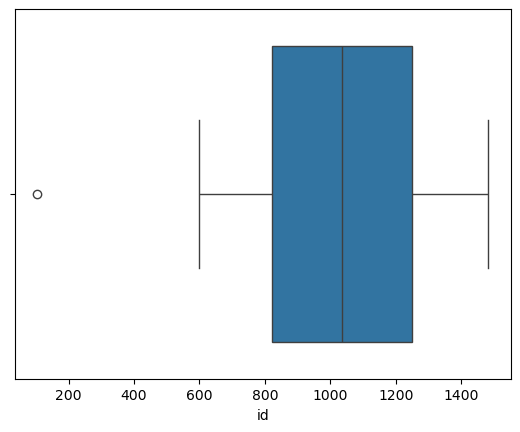

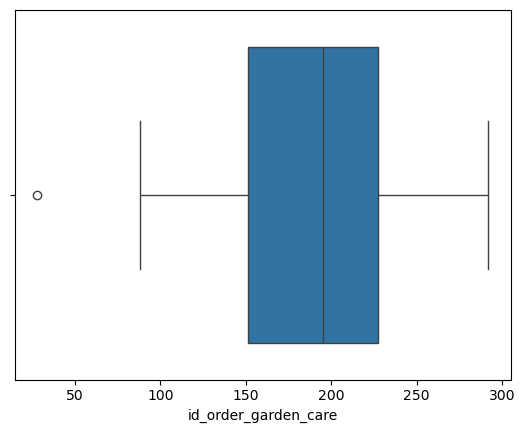

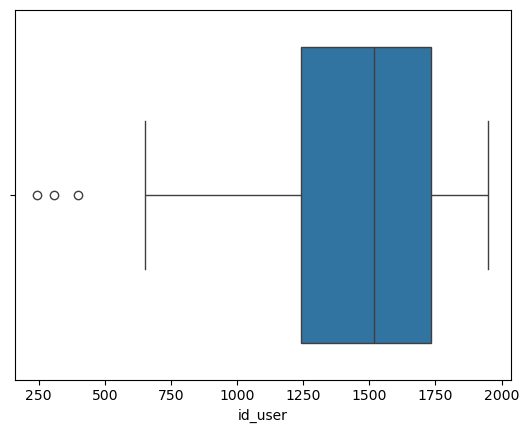

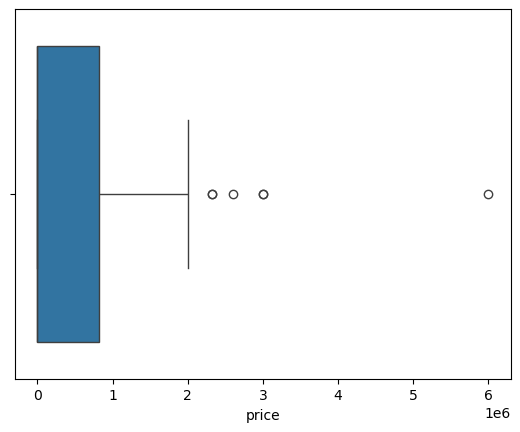

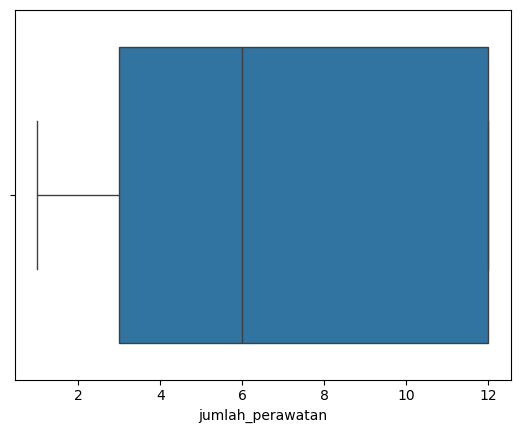

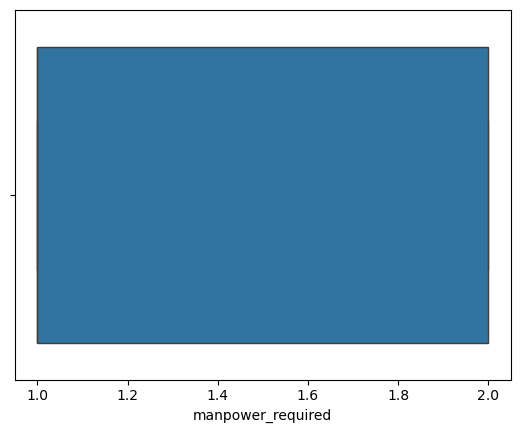

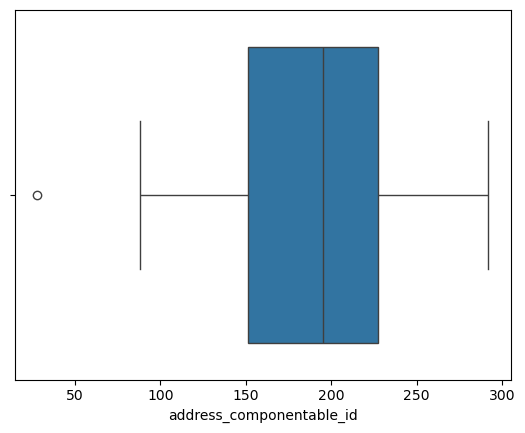

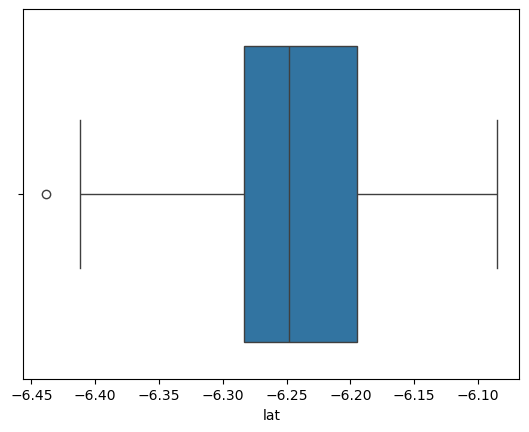

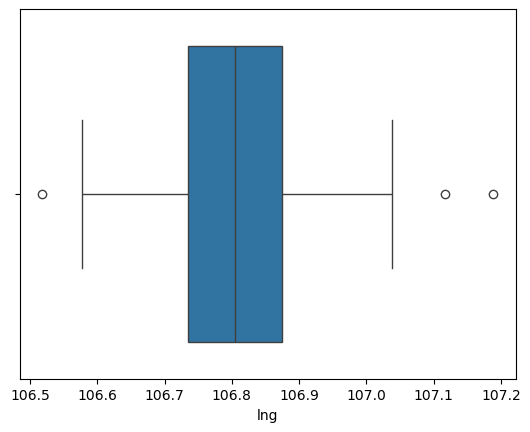

In [146]:
# detecting using boxplot on each column (multiple) -> outliers hanya numerical
for i in df_ogc_num:
    sns.boxplot(data = df_ogc_num, x = i)
    plt.show()

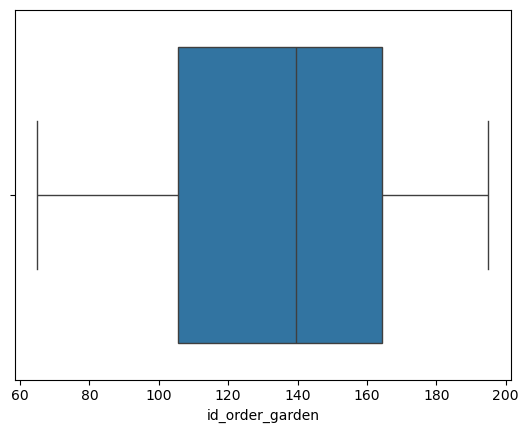

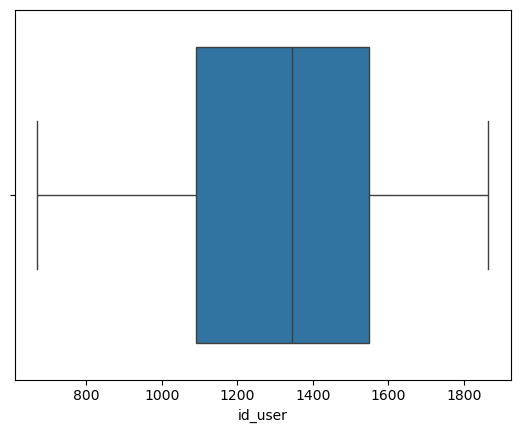

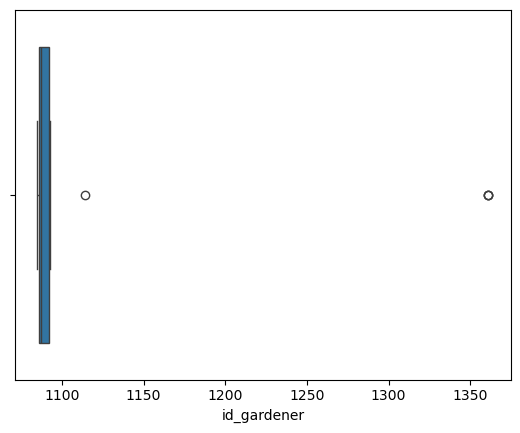

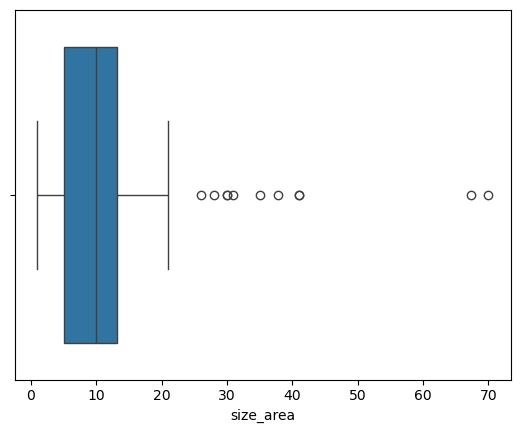

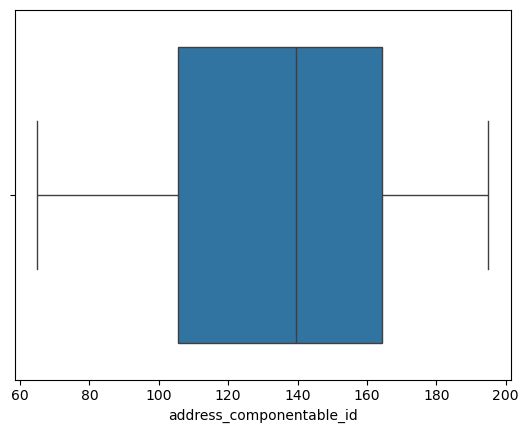

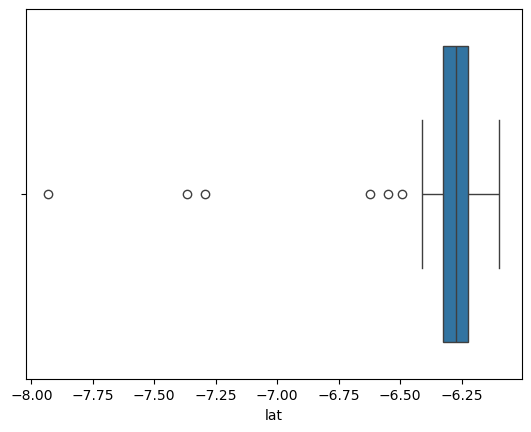

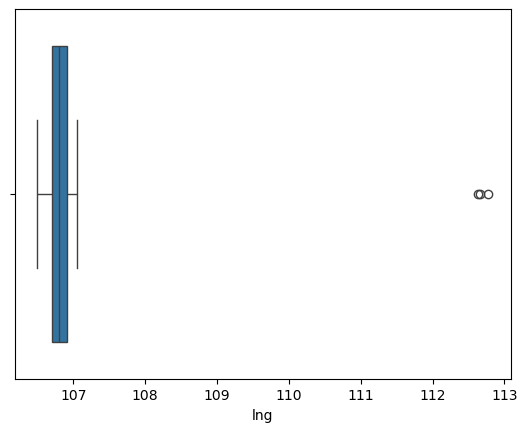

In [147]:
# detecting using boxplot on each column (multiple) -> outliers hanya numerical
for i in df_og_num:
    sns.boxplot(data = df_og_num, x = i)
    plt.show()

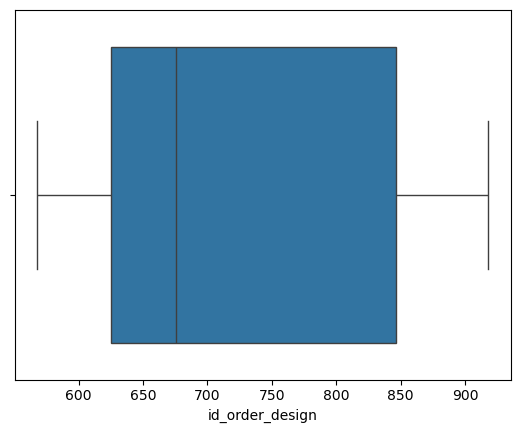

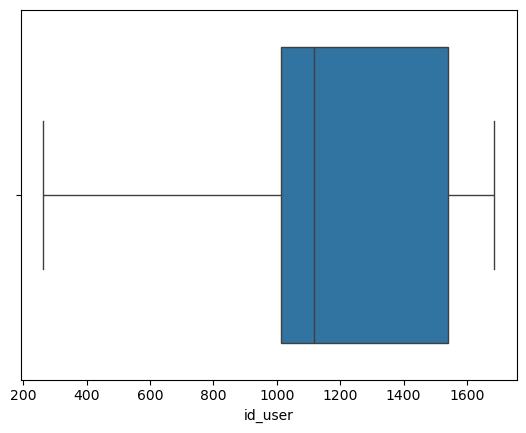

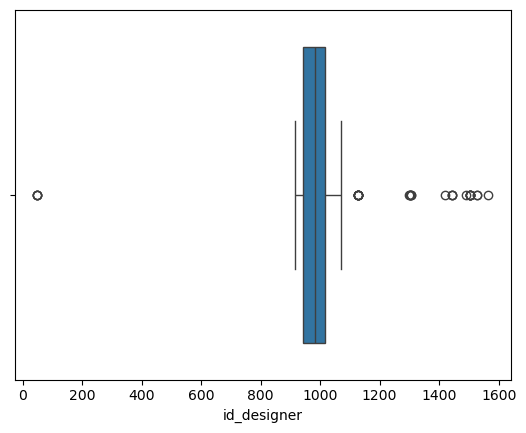

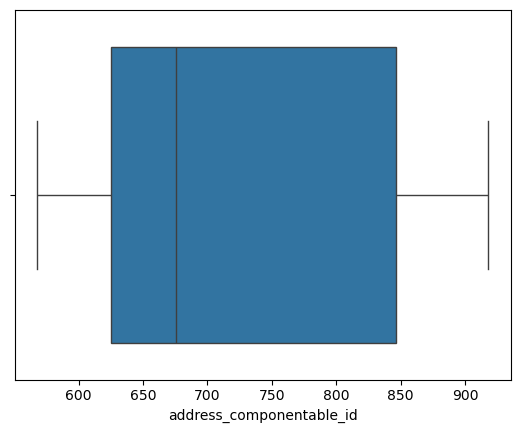

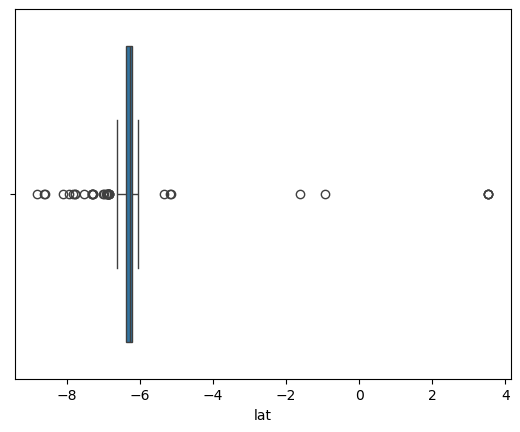

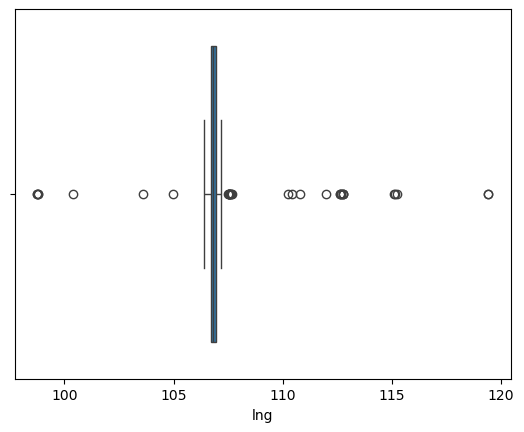

In [148]:
# detecting using boxplot on each column (multiple) -> outliers hanya numerical
for i in df_od_num:
    sns.boxplot(data = df_od_num, x = i)
    plt.show()

In [149]:
# function to find outliers, using numpy 
def find_outlier(data):
    Q1 = np.quantile(data, .25)
    Q2 = np.quantile(data, .50) # median
    Q3 = np.quantile(data, .75)

    # find IQR
    IQR = (Q3 - Q1) * 1.5 
    lower_limit = Q1 - IQR 
    upper_limit = Q3 + IQR 

    # find outliers
    outliers = ''
    for i in range(len(data)): 
        if data[i] > upper_limit: 
            outliers = outliers + str(data[i]) + ', '
            
        elif data[i] < lower_limit: 
            outliers = outliers + str(data[i]) + ', '
            
    return outliers

In [150]:
# detect outliers from each columns using loop 
for i in df_ogc_num: 
    val = df_ogc_num[i].sort_values().values.tolist()
    outliers = find_outlier(val)
    outlier_count = len(outliers)
    outlier_percent = (outlier_count / len(val)) * 100
    print(f"Outliers detected in '{i}': {outlier_count} ({outlier_percent:.2f}%)")

Outliers detected in 'id': 5 (5.32%)
Outliers detected in 'id_order_garden_care': 4 (4.26%)
Outliers detected in 'id_user': 15 (15.96%)
Outliers detected in 'price': 66 (70.21%)
Outliers detected in 'jumlah_perawatan': 0 (0.00%)
Outliers detected in 'manpower_required': 0 (0.00%)
Outliers detected in 'address_componentable_id': 4 (4.26%)
Outliers detected in 'lat': 10 (10.64%)
Outliers detected in 'lng': 27 (28.72%)


In [151]:
# detect outliers from each columns using loop 
for i in df_og_num: 
    val = df_og_num[i].sort_values().values.tolist()
    outliers = find_outlier(val)
    outlier_count = len(outliers)
    outlier_percent = (outlier_count / len(val)) * 100
    print(f"Outliers detected in '{i}': {outlier_count} ({outlier_percent:.2f}%)")

Outliers detected in 'id_order_garden': 0 (0.00%)
Outliers detected in 'id_user': 0 (0.00%)
Outliers detected in 'id_gardener': 32 (36.36%)
Outliers detected in 'size_area': 66 (75.00%)
Outliers detected in 'address_componentable_id': 0 (0.00%)
Outliers detected in 'lat': 60 (68.18%)
Outliers detected in 'lng': 27 (30.68%)


In [152]:
# detect outliers from each columns using loop 
for i in df_od_num: 
    val = df_od_num[i].sort_values().values.tolist()
    outliers = find_outlier(val)
    outlier_count = len(outliers)
    outlier_percent = (outlier_count / len(val)) * 100
    print(f"Outliers detected in '{i}': {outlier_count} ({outlier_percent:.2f}%)")

Outliers detected in 'id_order_design': 0 (0.00%)
Outliers detected in 'id_user': 0 (0.00%)
Outliers detected in 'id_designer': 248 (134.78%)
Outliers detected in 'address_componentable_id': 0 (0.00%)
Outliers detected in 'lat': 357 (194.02%)
Outliers detected in 'lng': 297 (161.41%)


outlier ini taidak dihapus, karena terlalu banyak, dan ini akan digunakan

### Find Optimal K Using Elbow Method

### Clustering Order Garden Care

[188.00000000000003, 132.3081212435126, 78.13685786820817, 58.7053265948956, 54.13422640849154, 41.00943395012829, 36.44935209893243, 28.622751967610778, 25.14300326961963]


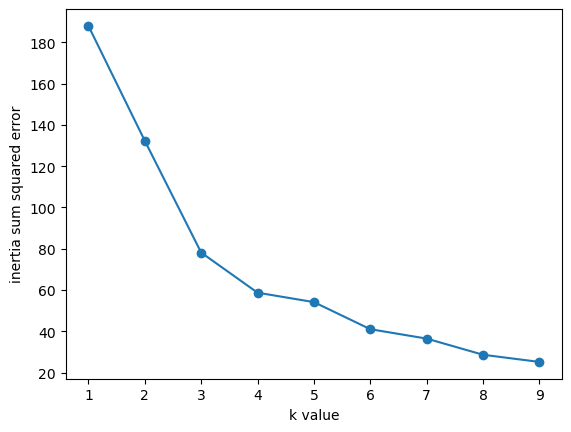

In [153]:
# Normalisasi data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_ogc_clean[["lat","lng"]])
# find k 
k = range(1, 10)
inertia = []

for i in k: 
    model = KMeans(n_clusters=i, random_state=42 )
    model.fit(scaled_features)
    inertia.append(model.inertia_)


# print inertia
print(inertia)


# plot the elbow 
plt.plot(k, inertia, "o-")
plt.xlabel("k value")
plt.ylabel('inertia sum squared error')
plt.show()

In [154]:
# fit kmeans model 
model = KMeans(n_clusters=7 , max_iter= 1000, random_state=42)
model.fit(scaled_features)

KMeans(max_iter=1000, n_clusters=7, random_state=42)

In [155]:
# predict clusters 
df_ogc_clean['cluster'] = model.predict(scaled_features)

### Clustering Order Garden

[175.99999999999997, 16.10946915001038, 9.788638061332433, 7.447100517734696, 6.318361015502458, 2.490251954829832, 1.879163340847978, 1.4177361300440032, 1.2354488750530026]


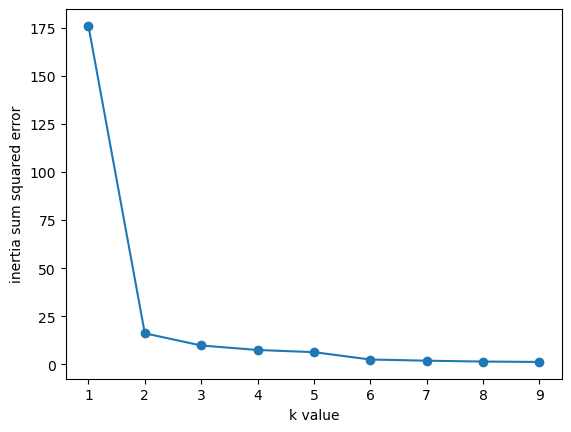

In [156]:
# Normalisasi data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_og_clean[["lat","lng"]])
# find k 
k = range(1, 10)
inertia = []

for i in k: 
    model = KMeans(n_clusters=i, random_state=42 )
    model.fit(scaled_features)
    inertia.append(model.inertia_)
    
# print inertia
print(inertia)

# plot the elbow 
plt.plot(k, inertia, "o-")
plt.xlabel("k value")
plt.ylabel('inertia sum squared error')
plt.show()

In [157]:
# fit kmeans model 
model = KMeans(n_clusters= 3, max_iter= 1000, random_state=42)
model.fit(scaled_features)

KMeans(max_iter=1000, n_clusters=3, random_state=42)

In [158]:
# predict clusters 
df_og_clean['cluster'] = model.predict(scaled_features)

### Clustering Order Design

[368.0, 158.37404505516992, 44.075180832769256, 32.5196161564615, 16.85156273026178, 7.651772535766982, 5.117820020404313, 3.5048234275619743, 2.570444416797133]


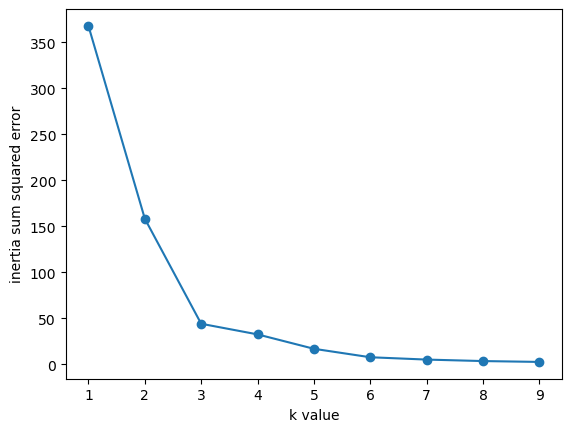

In [161]:
# Normalisasi data
scaler = StandardScaler()
scaled_od = scaler.fit_transform(df_od_clean[["lat","lng"]])
# find m 
m = range(1, 10)
inertia = []

for i in m: 
    model = KMeans(n_clusters=i, random_state=42 )
    model.fit(scaled_od)
    inertia.append(model.inertia_)

# print inertia
print(inertia)

# plot the elbow 
plt.plot(m, inertia, "o-")
plt.xlabel("k value")
plt.ylabel('inertia sum squared error')
plt.show()

In [162]:
# fit kmeans model 
model = KMeans(n_clusters= 5, max_iter= 1000, random_state=42)
model.fit(scaled_od)

KMeans(max_iter=1000, n_clusters=5, random_state=42)

In [163]:
# predict clusters 
df_od_clean['cluster'] = model.predict(scaled_od)

### KNN (Mengelompokan Jarak yang Saling Berdekatan -> Neighbors)

### Order Garden Care

In [167]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from geopy.distance import geodesic
import folium

# Dataframe 
data_ogc = pd.DataFrame(df_ogc_clean)

# Variabel Fitur
X = data_ogc[['lat', 'lng']]

# Model KNN
knn = NearestNeighbors(n_neighbors=3, metric='euclidean')
knn.fit(X)

# Mendapatkan 3 tetangga terdekat
distances, indices = knn.kneighbors(X)

# Tentukan jarak maksimum (misalnya 100 meter)
max_distance = 10000  # dalam meter

# Fungsi untuk menghitung jarak antar dua titik (menggunakan geopy)
def calculate_distance(lat1, lng1, lat2, lng2):
    return geodesic((lat1, lng1), (lat2, lng2)).meters  # Menghitung jarak dalam meter

# Menambahkan neighbors dan jarak ke tabel
data_ogc['neighbors'] = [
    data_ogc['id'].iloc[neighbors].values.tolist() for neighbors in indices
]

# Menambahkan kolom jarak
data_ogc['neighbor_distances'] = [
    [distances[i][j] for j in range(len(distances[i]))] for i in range(len(distances))
]

# Menentukan tetangga yang berada dalam jarak maksimum
valid_neighbors_list = []
valid_distances_list = []

for i, row in data_ogc.iterrows():
    valid_neighbors = []
    valid_distances = []
    for j, neighbor_id in enumerate(row['neighbors']):
        # Mendapatkan data untuk neighbor
        neighbor_row = data_ogc[data_ogc['id'] == neighbor_id]
        if not neighbor_row.empty:
            neighbor_lat = neighbor_row.iloc[0]['lat']
            neighbor_lng = neighbor_row.iloc[0]['lng']
            
            # Menghitung jarak antar titik
            distance = calculate_distance(row['lat'], row['lng'], neighbor_lat, neighbor_lng)
            
            # Memeriksa apakah jarak dalam batas yang ditentukan
            if distance <= max_distance:
                valid_neighbors.append(neighbor_id)
                valid_distances.append(distance)
    
    # Menambahkan valid_neighbors dan valid_distances ke list
    valid_neighbors_list.append(valid_neighbors)
    valid_distances_list.append(valid_distances)

# Menambahkan valid_neighbors dan valid_distances ke DataFrame
data_ogc['valid_neighbors'] = valid_neighbors_list
data_ogc['valid_distances'] = valid_distances_list

# lihat data 
data_ogc.head()



,id,id_order_garden_care,status,id_user,price,code,size,jumlah_perawatan,manpower_required,address,address_componentable_id,lat,lng,order_date,cluster,neighbors,neighbor_distances,valid_neighbors,valid_distances
0,105,28,paid,1186,0.0,dokumentasigc,11-20m<sup>2</sup>,3,1,Semanggi,28,-6.22111,106.814,2024-07-02 10:18:44,0,"[105, 1369, 1273]","[0.0, 0.0, 0.015208800084153184]","[105, 1369, 1273]","[0.0, 0.0, 1682.3251674120347]"
1,598,88,paid,1268,0.0,dokumentasigc,41-50m<sup>2</sup>,12,2,"Jl Palem VI/35, Petukangan Utara, Jakarta Selatan",88,-6.22585,106.757,2024-07-04 11:54:30,1,"[598, 1031, 757]","[0.0, 0.00932952303176105, 0.00932952303176105]","[598, 1031, 757]","[0.0, 1032.2791218934954, 1032.2791218934954]"
2,626,103,paid,1329,1049500.0,SUBS50,11-20m<sup>2</sup>,6,1,"Jl. Canary Timur 2 No. 3 (The Springs, Cluster...",103,-6.26852,106.642,2024-07-25 14:33:54,3,"[626, 872, 897]","[0.0, 0.01826407402525223, 0.020780204522571247]","[626, 872, 897]","[0.0, 2020.2576762257936, 2298.453920721123]"
3,632,104,paid,1353,1999500.0,SUBS50,11-20m<sup>2</sup>,12,1,Perumahan Graha Mirai Cluster Hikari Blok H No...,104,-6.38129,107.117,2024-07-26 09:17:45,2,"[632, 951, 930]","[0.0, 0.07608562610637913, 0.1282342391875163]","[632, 951]","[0.0, 8417.422269058583]"
4,648,105,paid,1356,1549500.0,SUBS50,21-30m<sup>2</sup>,6,2,"Jl Cisanggiri III No.18\r\nKebayoran Baru, Jak...",105,-6.24165,106.813,2024-07-27 14:07:02,1,"[648, 1273, 1244]","[0.0, 0.011513400887658266, 0.013483931177521582]","[648, 1273, 1244]","[0.0, 1273.667620124709, 1492.108136461525]"


### Order Garden 

In [169]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from geopy.distance import geodesic
import folium

# Dataframe 
data_og = pd.DataFrame(df_og_clean)

# Variabel Fitur
X = data_og[['lat', 'lng']]

# Model KNN
knn = NearestNeighbors(n_neighbors=3, metric='euclidean')
knn.fit(X)

# Mendapatkan 3 tetangga terdekat
distances, indices = knn.kneighbors(X)

# Tentukan jarak maksimum (misalnya 100 meter)
max_distance = 7000  # dalam meter

# Fungsi untuk menghitung jarak antar dua titik (menggunakan geopy)
def calculate_distance(lat1, lng1, lat2, lng2):
    return geodesic((lat1, lng1), (lat2, lng2)).meters  # Menghitung jarak dalam meter

# Menambahkan neighbors dan jarak ke tabel
data_og['neighbors'] = [
    data_og['id_order_garden'].iloc[neighbors].values.tolist() for neighbors in indices
]

# Menambahkan kolom jarak
data_og['neighbor_distances'] = [
    [distances[i][j] for j in range(len(distances[i]))] for i in range(len(distances))
]

# Menentukan tetangga yang berada dalam jarak maksimum
valid_neighbors_list = []
valid_distances_list = []

for i, row in data_og.iterrows():
    valid_neighbors = []
    valid_distances = []
    for j, neighbor_id in enumerate(row['neighbors']):
        # Mendapatkan data untuk neighbor
        neighbor_row = data_og[data_og['id_order_garden'] == neighbor_id]
        if not neighbor_row.empty:
            neighbor_lat = neighbor_row.iloc[0]['lat']
            neighbor_lng = neighbor_row.iloc[0]['lng']
            
            # Menghitung jarak antar titik
            distance = calculate_distance(row['lat'], row['lng'], neighbor_lat, neighbor_lng)
            
            # Memeriksa apakah jarak dalam batas yang ditentukan
            if distance <= max_distance:
                valid_neighbors.append(neighbor_id)
                valid_distances.append(distance)
    
    # Menambahkan valid_neighbors dan valid_distances ke list
    valid_neighbors_list.append(valid_neighbors)
    valid_distances_list.append(valid_distances)

# Menambahkan valid_neighbors dan valid_distances ke DataFrame
data_og['valid_neighbors'] = valid_neighbors_list
data_og['valid_distances'] = valid_distances_list

data_og.head()

,id_order_garden,id_user,id_gardener,status_garden,code,size_area,address,address_componentable_id,lat,lng,order_date,cluster,neighbors,neighbor_distances,valid_neighbors,valid_distances
0,65,927,1087.0,in_review,N/A,11.0,Jl. Ujung Gedong RT 002 RW 012 no.69 Kel. Gedo...,65,-6.29776,106.862,2024-04-23 16:05:27,0,"[65, 116, 183]","[0.0, 0.021464240028476186, 0.02914463243891996]","[65, 116, 183]","[0.0, 2375.0149611740835, 3223.6245242871646]"
1,66,926,1093.0,in_review,N/A,28.0,"Mahagoni Park Bintaro Blok B1 No 50, Perigi Ba...",66,-6.26076,106.690,2024-04-27 12:19:36,2,"[66, 81, 104]","[0.0, 0.008526576100635307, 0.021270270332086356]","[66, 81, 104]","[0.0, 943.4743886329433, 2353.721237571324]"
2,70,925,1085.0,finish,N/A,35.0,"Premier Terrace Blok M3, Jalan Raya Ciracas, C...",70,-6.32984,106.876,2024-05-16 17:59:26,0,"[70, 74, 65]","[0.0, 0.03386704740599568, 0.03500180566771175]","[70, 74, 65]","[0.0, 3745.309286065119, 3871.1113548546737]"
3,72,1024,1087.0,finish,N/A,2.0,"Bekasi, Kota Bekasi, Jawa Barat",72,-6.23827,106.976,2024-05-24 06:24:44,2,"[123, 72, 111]","[0.0, 0.0, 0.017669773626167787]","[123, 72, 111]","[0.0, 0.0, 1954.695088865319]"
4,74,1052,1087.0,finish,potongandeposit01,5.0,"Wakay Residences, no A7, Jl. Abdulrahman, RT.1...",74,-6.36347,106.880,2024-06-12 08:40:53,0,"[74, 92, 171]","[0.0, 0.015778517040583907, 0.025098334606096888]","[74, 92, 171]","[0.0, 1745.1645581186592, 2776.517031211267]"


### Order Design

In [172]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from geopy.distance import geodesic
import folium

# Dataframe 
data_od = pd.DataFrame(df_od_clean)

# Variabel Fitur
X = data_od[['lat', 'lng']]

# Model KNN
knn = NearestNeighbors(n_neighbors=3, metric='euclidean')
knn.fit(X)

# Mendapatkan 3 tetangga terdekat
distances, indices = knn.kneighbors(X)

# Tentukan jarak maksimum (misalnya 100 meter)
max_distance = 5000  # dalam meter

# Fungsi untuk menghitung jarak antar dua titik (menggunakan geopy)
def calculate_distance(lat1, lng1, lat2, lng2):
    return geodesic((lat1, lng1), (lat2, lng2)).meters  # Menghitung jarak dalam meter

# Menambahkan neighbors dan jarak ke tabel
data_od['neighbors'] = [
    data_od['id_order_design'].iloc[neighbors].values.tolist() for neighbors in indices
]

# Menambahkan kolom jarak
data_od['neighbor_distances'] = [
    [distances[i][j] for j in range(len(distances[i]))] for i in range(len(distances))
]

# Menentukan tetangga yang berada dalam jarak maksimum
valid_neighbors_list = []
valid_distances_list = []

for i, row in data_od.iterrows():
    valid_neighbors = []
    valid_distances = []
    for j, neighbor_id in enumerate(row['neighbors']):
        # Mendapatkan data untuk neighbor
        neighbor_row = data_od[data_od['id_order_design'] == neighbor_id]
        if not neighbor_row.empty:
            neighbor_lat = neighbor_row.iloc[0]['lat']
            neighbor_lng = neighbor_row.iloc[0]['lng']
            
            # Menghitung jarak antar titik
            distance = calculate_distance(row['lat'], row['lng'], neighbor_lat, neighbor_lng)
            
            # Memeriksa apakah jarak dalam batas yang ditentukan
            if distance <= max_distance:
                valid_neighbors.append(neighbor_id)
                valid_distances.append(distance)
    
    # Menambahkan valid_neighbors dan valid_distances ke list
    valid_neighbors_list.append(valid_neighbors)
    valid_distances_list.append(valid_distances)

# Menambahkan valid_neighbors dan valid_distances ke DataFrame
data_od['valid_neighbors'] = valid_neighbors_list
data_od['valid_distances'] = valid_distances_list

data_od.

,id_order_design,id_user,id_designer,code,status_design,address,address_componentable_id,lat,lng,order_date,cluster,neighbors,neighbor_distances,valid_neighbors,valid_distances
0,568,921,949.0,PREBUILD50,in_review,"Emerald View, Jln. Emerald Citra V, Blok D no....",568,-6.28352,106.711,2024-04-20 15:28:15,0,"[674, 641, 568]","[0.0, 0.0, 0.0]","[674, 641, 568]","[0.0, 0.0, 0.0]"
1,569,923,950.0,PREBUILD50,in_review,"Perumahan Jatinegara Indah, Jl Lawu Ujung Blok...",569,-6.19922,106.927,2024-04-21 10:30:22,0,"[569, 663, 839]","[0.0, 0.029463088772227138, 0.03904377543219883]","[569, 663, 839]","[0.0, 3258.7180589049435, 4317.821106738846]"
2,570,925,943.0,PREBUILD50,finish,"Premier Terrace Blok M3, Jalan Raya Ciracas, C...",570,-6.32984,106.876,2024-04-21 16:00:33,0,"[570, 636, 572]","[0.0, 0.03386704740599568, 0.03500180566771175]","[570, 636, 572]","[0.0, 3745.309286065119, 3871.1113548546737]"
3,571,926,946.0,PREBUILD50,in_review,"Mahagoni Park Bintaro Blok B1 No 50, Perigi Ba...",571,-6.26076,106.690,2024-04-22 10:25:36,0,"[571, 865, 646]","[0.0, 0.00457192519623849, 0.008526576100635307]","[571, 865, 646]","[0.0, 505.73972627959273, 943.4743886329433]"
4,572,927,928.0,N/A,finish,Jl. Ujung Gedong RT 002 RW 012 no.69 Kel. Gedo...,572,-6.29776,106.862,2024-04-22 11:41:42,0,"[572, 608, 650]","[0.0, 0.02196235187770273, 0.028981897798445348]","[572, 608, 650]","[0.0, 2430.073915048433, 3206.8064940288273]"


### Analisis dan Visualization

#### Order Garden Care

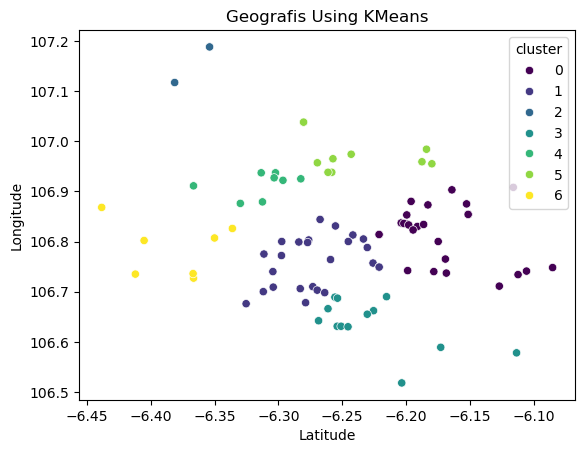

In [174]:
# visualisasi cluster order garden care 
sns.scatterplot(data=df_ogc_clean,x='lat',y='lng',hue='cluster', palette='viridis')
plt.title("Geografis Using KMeans")
plt.xlabel('Latitude') # xlabel
plt.ylabel('Longitude') # y label
plt.show()

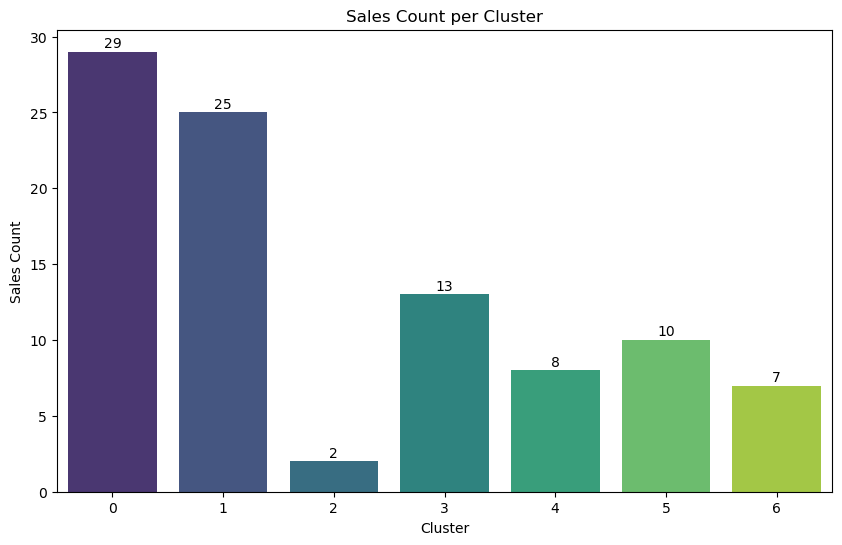

In [177]:
# Menghitung jumlah sales count per cluster
sales_count_per_cluster = df_ogc_clean.groupby('cluster').size().reset_index(name='sales_count')

# Mengurutkan hasil dari sales count tertinggi ke terendah
sales_count_per_cluster = sales_count_per_cluster.sort_values(by='sales_count', ascending=False)

# Plot barplot untuk sales count per cluster
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=sales_count_per_cluster, x='cluster', y='sales_count', palette='viridis')

# Menambahkan judul dan label
plt.title('Sales Count per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Sales Count')

# add numerical
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',
                (p.get_x() + p.get_width()/  2.0, p.get_height()),
                textcoords='offset points', xytext=(0,3),
                ha='center', fontsize=10, color='black')

# Tampilkan plot
plt.show()

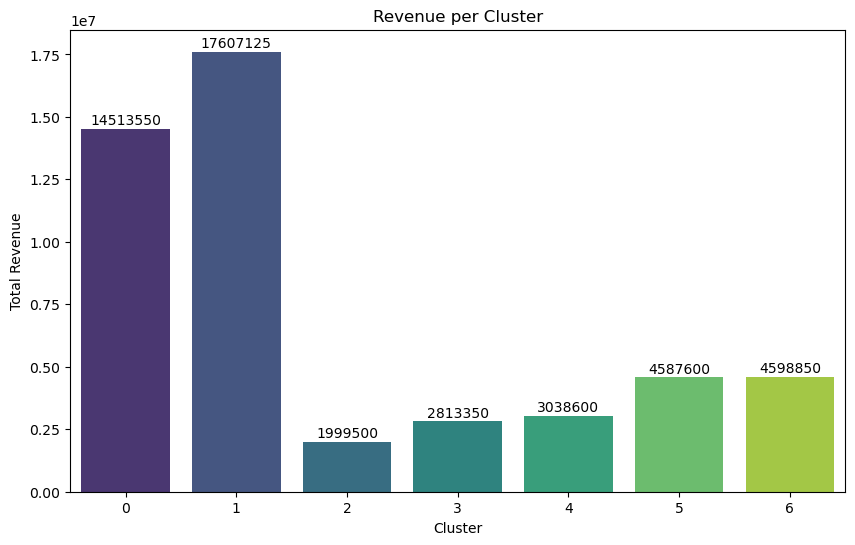

In [178]:
# Menghitung total revenue per cluster
revenue_per_cluster = df_ogc_clean.groupby('cluster')['price'].sum().reset_index(name='revenue')

# Mengurutkan hasil dari revenue tertinggi ke terendah
revenue_per_cluster = revenue_per_cluster.sort_values(by='revenue', ascending=False)


# Plot barplot untuk revenue per cluster
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=revenue_per_cluster, x='cluster', y='revenue', palette='viridis')

# Menambahkan judul dan label
plt.title('Revenue per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Total Revenue')


# add numerical
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',
                (p.get_x() + p.get_width()/  2.0, p.get_height()),
                textcoords='offset points', xytext=(0,3),
                ha='center', fontsize=10, color='black')
    
# Tampilkan plot
plt.show()


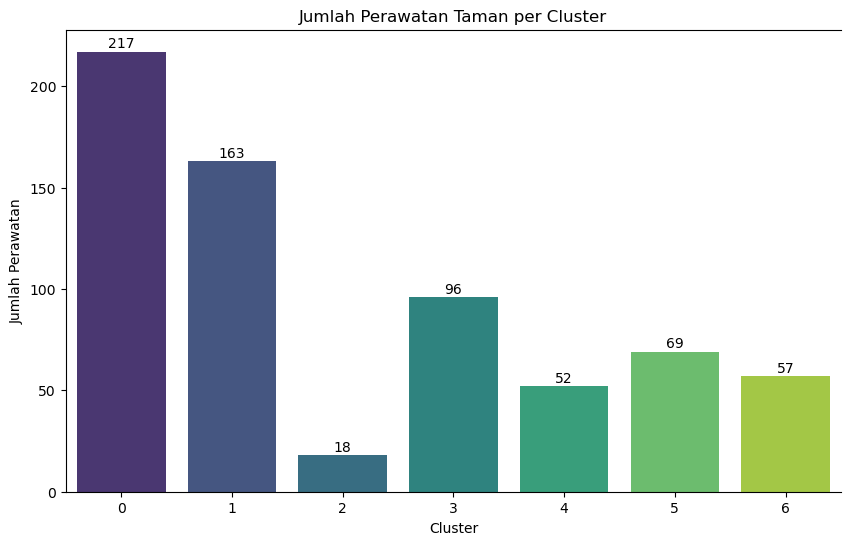

In [179]:
# visualisasi jumlah perawatan per cluster
plt.figure(figsize=(10, 6))

cluster_care_count = df_ogc_clean.groupby('cluster')['jumlah_perawatan'].sum().reset_index()
cluster_care_count = cluster_care_count.sort_values(by='jumlah_perawatan', ascending=False)

ax = sns.barplot(data=cluster_care_count, x='cluster', y='jumlah_perawatan', palette='viridis', ci=None)
sns.despine(top=False)
plt.title('Jumlah Perawatan Taman per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Jumlah Perawatan')

# add numerical
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',
                (p.get_x() + p.get_width()/  2.0, p.get_height()),
                textcoords='offset points', xytext=(0,3),
                ha='center', fontsize=10, color='black')
plt.show()

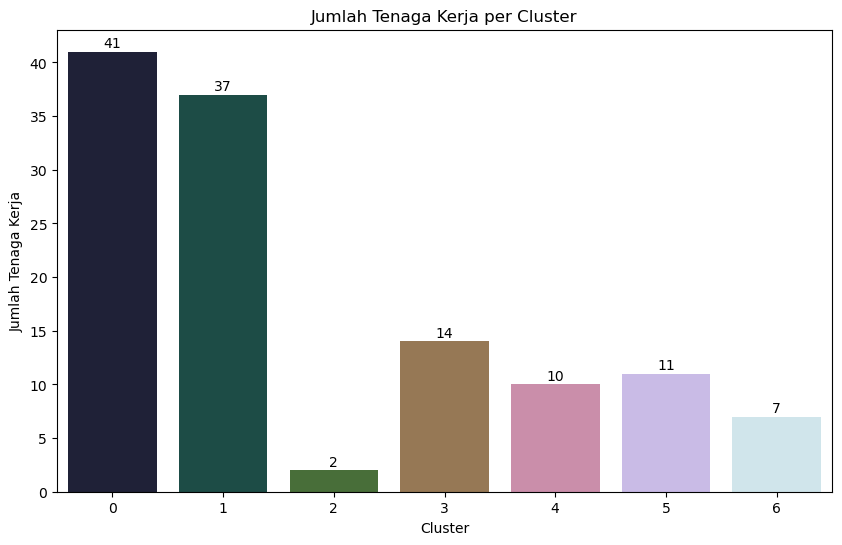

In [180]:
# visualisasi manpower per cluster
manpower_per_cluster = df_ogc_clean.groupby('cluster')['manpower_required'].sum().reset_index()
manpower_per_cluster = manpower_per_cluster.sort_values(by='manpower_required', ascending=False)

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=manpower_per_cluster, x='cluster', y='manpower_required', palette='cubehelix')
plt.title('Jumlah Tenaga Kerja per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Jumlah Tenaga Kerja')

# add numerical
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',
                (p.get_x() + p.get_width()/  2.0, p.get_height()),
                textcoords='offset points', xytext=(0,3),
                ha='center', fontsize=10, color='black')
plt.show()


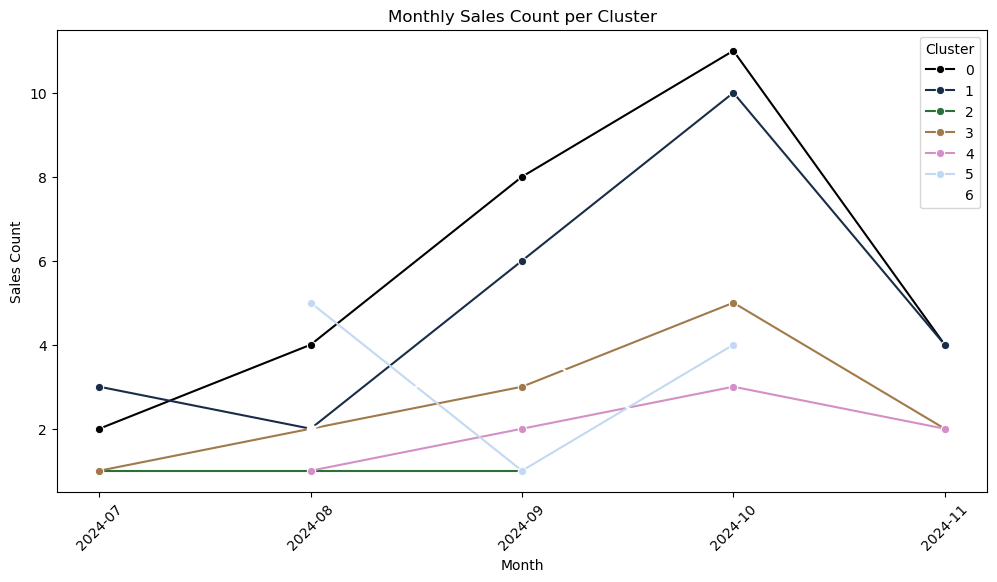

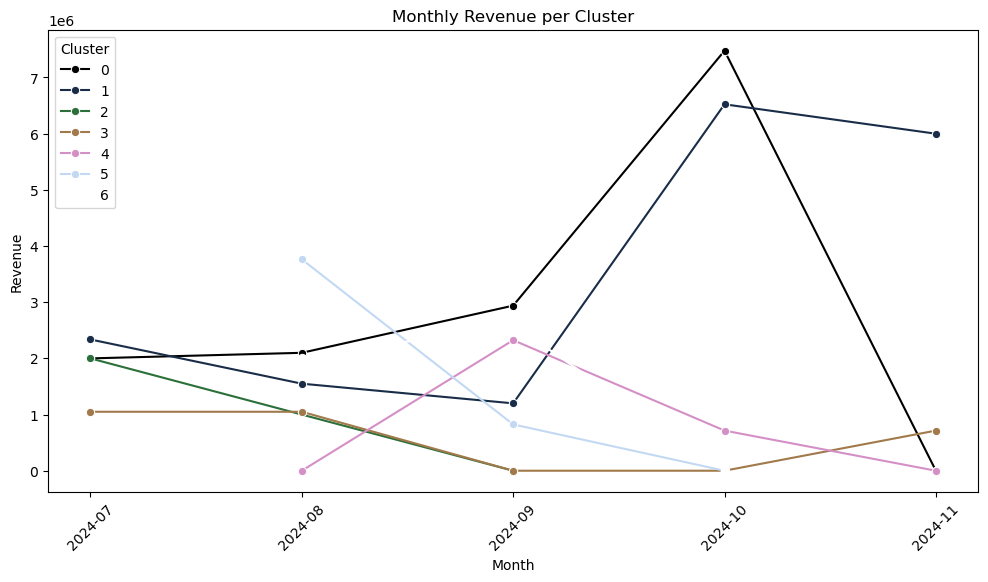

In [183]:
# Tambahkan kolom bulan
df_ogc_clean['month'] = df_ogc_clean['order_date'].dt.to_period('M').astype(str)

# Tambahkan kolom sales_count (asumsikan setiap baris adalah satu penjualan)
df_ogc_clean['sales_count'] = 1

# Hitung monthly sales count dan revenue per cluster
monthly_sales = df_ogc_clean.groupby(['cluster', 'month'])['sales_count'].sum().reset_index()
monthly_revenue = df_ogc_clean.groupby(['cluster', 'month'])['price'].sum().reset_index(name='revenue')

# Plot Monthly Sales Count per Cluster
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='month', y='sales_count', hue='cluster', marker='o', palette='cubehelix')
plt.title('Monthly Sales Count per Cluster')
plt.xlabel('Month')
plt.ylabel('Sales Count')
plt.xticks(rotation=45)
plt.legend(title='Cluster')
plt.show()

# Plot Monthly Revenue per Cluster
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_revenue, x='month', y='revenue', hue='cluster', marker='o', palette='cubehelix')
plt.title('Monthly Revenue per Cluster')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.legend(title='Cluster')
plt.show()

In [187]:
# Visualization
# Buat Peta Folium
center_lat = data_ogc['lat'].mean()
center_lng = data_ogc['lng'].mean()
mymap = folium.Map(location=[center_lat, center_lng], zoom_start=15)

cluster_colors = ['red', 'blue', 'green', 'purple', 'orange', 'darkred', 'lightblue', 'lightgreen']
color_mapping = {}  # Dictionary untuk menyimpan warna per cluster

# Loop untuk mengatur warna unik setiap cluster
unique_clusters = data_ogc['cluster'].unique()
for i, cluster in enumerate(unique_clusters):
    color_mapping[cluster] = cluster_colors[i % len(cluster_colors)]  # Gunakan warna secara berulang jika cluster lebih banyak dari warna

# Menambahkan marker untuk setiap titik
for index, row in data_ogc.iterrows():
    cluster = row['cluster']
    color = color_mapping.get(cluster, 'gray')  # Gunakan warna default jika cluster tidak dikenal
    folium.Marker(
        location=[row['lat'], row['lng']],
        popup=f"ID: {row['id']}<br>Neighbors: {row['valid_neighbors']}<br>Address: {row['address']}",
        icon=folium.Icon(color=color)  # Warna marker bisa disesuaikan
    ).add_to(mymap)

# Menambahkan garis yang menghubungkan titik-titik yang berdekatan (valid_neighbors)
for index, row in data_ogc.iterrows():
    for neighbor_id, distance in zip(row['valid_neighbors'], row['valid_distances']):
        # Cari data neighbor berdasarkan ID
        neighbor_row = data_ogc[data_ogc['id'] == neighbor_id]
        if not neighbor_row.empty:
            neighbor_lat = neighbor_row.iloc[0]['lat']
            neighbor_lng = neighbor_row.iloc[0]['lng']
            
            # Tambahkan garis yang menghubungkan titik ini dengan tetangganya
            folium.PolyLine(
                locations=[[row['lat'], row['lng']], [neighbor_lat, neighbor_lng]],
                color='blue',  # Warna garis bisa disesuaikan
                weight=2.5,
                opacity=0.7
            ).add_to(mymap)



# Tampilkan hasil
mymap

#### Order Garden

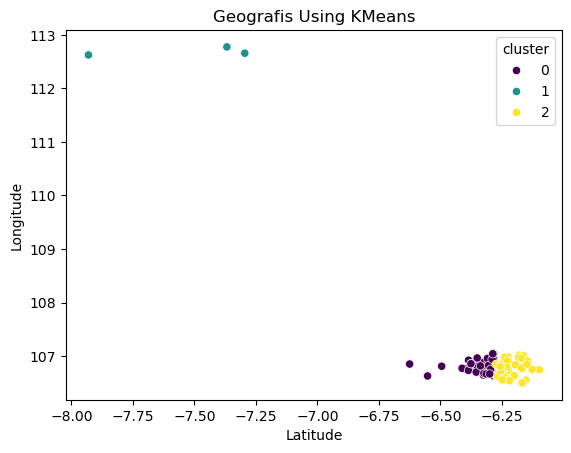

In [175]:
# visualisation clustering order garden
sns.scatterplot(data=df_og_clean,x='lat',y='lng',hue='cluster', palette='viridis')
plt.title("Geografis Using KMeans")
plt.xlabel('Latitude') # xlabel
plt.ylabel('Longitude') # y label
plt.show()

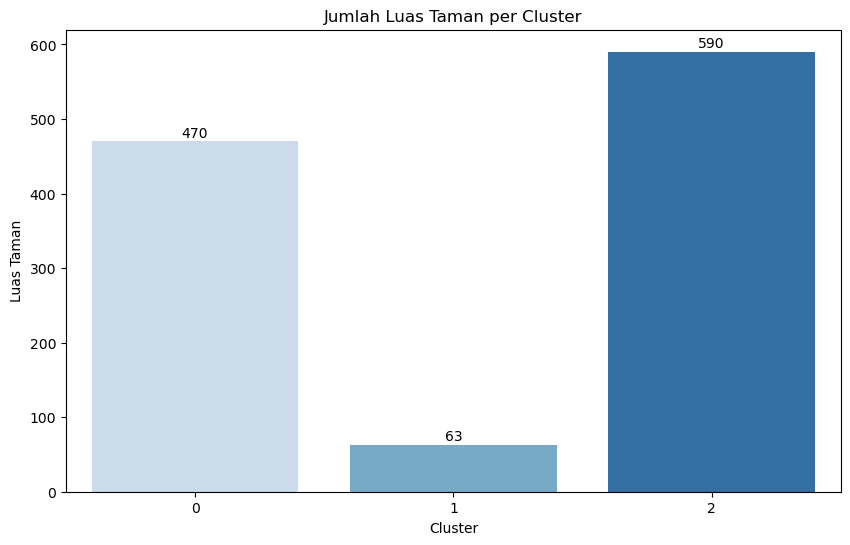

In [182]:
# Luas Taman yang Banyak Dipesan Berdasarkan Cluster

garden_size_per_cluster = df_og_clean.groupby('cluster')['size_area'].sum().reset_index()
garden_size_per_cluster = garden_size_per_cluster.sort_values(by='size_area', ascending=False)

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=garden_size_per_cluster, x='cluster', y='size_area', palette='Blues')
plt.title('Jumlah Luas Taman per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Luas Taman')

# add numerical
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',
                (p.get_x() + p.get_width()/  2.0, p.get_height()),
                textcoords='offset points', xytext=(0,3),
                ha='center', fontsize=10, color='black')
plt.show()

In [198]:
# Visualization
# Buat Peta Folium
center_lat = data_og['lat'].mean()
center_lng = data_og['lng'].mean()
mymap = folium.Map(location=[center_lat, center_lng], zoom_start=15)

cluster_colors = ['red', 'blue', 'green', 'purple', 'orange', 'darkred', 'lightblue', 'lightgreen']
color_mapping = {}  # Dictionary untuk menyimpan warna per cluster

# Loop untuk mengatur warna unik setiap cluster
unique_clusters = data_og['cluster'].unique()
for i, cluster in enumerate(unique_clusters):
    color_mapping[cluster] = cluster_colors[i % len(cluster_colors)]  # Gunakan warna secara berulang jika cluster lebih banyak dari warna

# Menambahkan marker untuk setiap titik
for index, row in data_og.iterrows():
    cluster = row['cluster']
    color = color_mapping.get(cluster, 'gray')  # Gunakan warna default jika cluster tidak dikenal
    folium.Marker(
        location=[row['lat'], row['lng']],
        popup=f"ID: {row['id_order_garden']}<br>Neighbors: {row['valid_neighbors']}<br>Address: {row['address']}",
        icon=folium.Icon(color=color)  # Warna marker bisa disesuaikan
    ).add_to(mymap)

# Menambahkan garis yang menghubungkan titik-titik yang berdekatan (valid_neighbors)
for index, row in data_og.iterrows():
    for neighbor_id, distance in zip(row['valid_neighbors'], row['valid_distances']):
        # Cari data neighbor berdasarkan ID
        neighbor_row = data_og[data_og['id_order_garden'] == neighbor_id]
        if not neighbor_row.empty:
            neighbor_lat = neighbor_row.iloc[0]['lat']
            neighbor_lng = neighbor_row.iloc[0]['lng']
            
            # Tambahkan garis yang menghubungkan titik ini dengan tetangganya
            folium.PolyLine(
                locations=[[row['lat'], row['lng']], [neighbor_lat, neighbor_lng]],
                color='blue',  # Warna garis bisa disesuaikan
                weight=2.5,
                opacity=0.7
            ).add_to(mymap)



# Tampilkan hasil
mymap

### Order Design

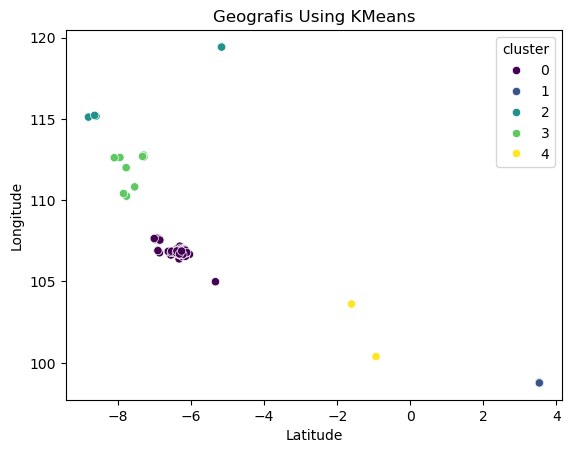

In [194]:
# visualisation clustering order garden
sns.scatterplot(data=df_od_clean,x='lat',y='lng',hue='cluster', palette='viridis')
plt.title("Geografis Using KMeans")
plt.xlabel('Latitude') # xlabel
plt.ylabel('Longitude') # y label
plt.show()

In [91]:
# Visualization
# Buat Peta Folium
center_lat = data_od['lat'].mean()
center_lng = data_od['lng'].mean()
mymap = folium.Map(location=[center_lat, center_lng], zoom_start=15)

cluster_colors = ['red', 'blue', 'green', 'purple', 'orange', 'darkred', 'lightblue', 'lightgreen']
color_mapping = {}  # Dictionary untuk menyimpan warna per cluster

# Loop untuk mengatur warna unik setiap cluster
unique_clusters = data_od['cluster'].unique()
for i, cluster in enumerate(unique_clusters):
    color_mapping[cluster] = cluster_colors[i % len(cluster_colors)]  # Gunakan warna secara berulang jika cluster lebih banyak dari warna

# Menambahkan marker untuk setiap titik
for index, row in data_od.iterrows():
    cluster = row['cluster']
    color = color_mapping.get(cluster, 'gray')  # Gunakan warna default jika cluster tidak dikenal
    folium.Marker(
        location=[row['lat'], row['lng']],
        popup=f"ID: {row['id_order_design']}<br>Neighbors: {row['valid_neighbors']}<br>Address: {row['address']}",
        icon=folium.Icon(color=color)  # Warna marker bisa disesuaikan
    ).add_to(mymap)

# Menambahkan garis yang menghubungkan titik-titik yang berdekatan (valid_neighbors)
for index, row in data_od.iterrows():
    for neighbor_id, distance in zip(row['valid_neighbors'], row['valid_distances']):
        # Cari data neighbor berdasarkan ID
        neighbor_row = data_od[data_od['id_order_design'] == neighbor_id]
        if not neighbor_row.empty:
            neighbor_lat = neighbor_row.iloc[0]['lat']
            neighbor_lng = neighbor_row.iloc[0]['lng']
            
            # Tambahkan garis yang menghubungkan titik ini dengan tetangganya
            folium.PolyLine(
                locations=[[row['lat'], row['lng']], [neighbor_lat, neighbor_lng]],
                color='blue',  # Warna garis bisa disesuaikan
                weight=2.5,
                opacity=0.7
            ).add_to(mymap)



# Tampilkan hasil
mymap

### Hasil Export to CSV

In [191]:
# data_ogc.to_csv("order_garden_care_clustering_new.csv", index = False )

In [192]:
# data_og.to_csv("order_garden_clustering_new.csv", index = False )

In [193]:
# data_od.to_csv("order_design_clustering_new.csv", index = False )

In [100]:
# address_components_garden_care.to_csv("address_components_garden_care.csv", index = False )

In [104]:
# address_components_order_garden.to_csv("address_components_order_garden.csv", index = False )

In [108]:
# address_components_order_design.to_csv("address_components_order_design.csv", index = False )